## Imports and Loads

In [2]:
import random
import pickle
import os
import sys
import seaborn as sns
import statsmodels.api as sm
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import networkx as nx

import plotly.graph_objects as go
import plotly.express as px
import plotly.io as pio
from plotly.subplots import make_subplots

import sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score

from collections import Counter
from importlib import reload
import src.utils.utils
reload(src.utils.utils)

# fix random seed for reproducibility
np.random.seed(42)
random.seed(42)

In [3]:
data_folder = './data/'
pickle_folder = data_folder + 'pickle/'
imdb_folder = data_folder + 'IMDB/'
cmu_folder = data_folder + 'CMU/'

In [4]:
# Dataframe containing more than 25000 movies, with none of the features missing except 
# for some of the box office revenue

with open(pickle_folder+"movies_clean.p", 'rb') as f:
    movies_clean = pickle.load(f)

display(movies_clean.sample(5))

Wikipedia_movie_ID                  Movie_name  \
2705               956598                The Haunting   
18852            14754221         How to Frame a Figg   
9135              4662560                      Maniac   
11812             6961461       The Other Boleyn Girl   
13139             8540791  The Night Before Christmas   

       Movie_box_office_revenue  Year Year_Interval  nb_of_Genres  \
2705                177311151.0  1999     1970-2000             2   
18852                       NaN  1971     1970-2000             4   
9135                        NaN  1963     1950-1970             2   
11812                77713866.0  2008     2000-2015             8   
13139                       NaN  1951     1950-1970             3   

       Genre_Action  Genre_Adventure  Genre_Animated  Genre_Black-and-white  \
2705          False            False           False                  False   
18852         False            False           False                  False   
9135          False            False           False                  False   
11812         False            False           False                  False   
13139         False             True            True                  False   

       ...  Country_Germany  Country_Hong Kong  Country_India  Country_Italy  \
2705   ...            False              False          False          False   
18852  ...            False              False          False          False   
9135   ...            False              False          False          False   
11812  ...            False              False          False          False   
13139  ...            False              False          False          False   

       Country_Japan  Country_Other  Country_United Kingdom  \
2705           False          False                   False   
18852          False          False                   False   
9135           False          False                    True   
11812          False          False                    True   
13139          False           True                   False   

       Country_United States of America  averageRating  numVotes  
2705                               True            5.0   81444.0  
18852                              True            6.4    1052.0  
9135                              False            5.9    1588.0  
11812                              True            6.7  121186.0  
13139                             False            7.3     327.0  

[5 rows x 61 columns]

In [5]:
# Dataframe containing more than 16000 movies containing which is the same than above but
# with movies whose we know the release season
with open(pickle_folder+"movies_clean_with_season.p", 'rb') as f:
    movies_season = pickle.load(f)

display(movies_season.sample(5))

Wikipedia_movie_ID                  Movie_name  \
13809            25412052                   Joy House   
11757            19203216     Scream and Scream Again   
12071            20291261                  The Coffin   
10098            13472401  The Last of the High Kings   
13445            24211707                  Borderline   

       Movie_box_office_revenue  Year Year_Interval  nb_of_Genres  \
13809                       NaN  1964     1950-1970             6   
11757                       NaN  1970     1950-1970             5   
12071                       NaN  2008     2000-2015             2   
10098                       NaN  1996     1970-2000             6   
13445                       NaN  1980     1970-2000             1   

       Genre_Action  Genre_Adventure  Genre_Animated  Genre_Black-and-white  \
13809         False            False           False                  False   
11757         False            False           False                  False   
12071         False            False           False                  False   
10098         False            False           False                  False   
13445         False            False           False                  False   

       ...  Country_Hong Kong  Country_India  Country_Italy  Country_Japan  \
13809  ...              False          False          False          False   
11757  ...              False          False          False          False   
12071  ...              False          False          False          False   
10098  ...              False          False          False          False   
13445  ...              False          False          False          False   

       Country_Other  Country_United Kingdom  \
13809          False                   False   
11757          False                    True   
12071           True                   False   
10098           True                    True   
13445          False                   False   

       Country_United States of America  averageRating  numVotes  \
13809                             False            7.0    3011.0   
11757                             False            5.5    4570.0   
12071                              True            4.2     752.0   
10098                             False            6.1    1981.0   
13445                              True            6.0    2457.0   

       release_season  
13809          Summer  
11757          Winter  
12071          Autumn  
10098          Winter  
13445          Autumn  

[5 rows x 62 columns]

In [6]:
# Dataframe containing almost 132000 movie characters
with open(pickle_folder+"characters_clean.p", 'rb') as f:
    characters_clean = pickle.load(f)

display(characters_clean.sample(5))

Wikipedia_movie_ID Movie_release_date Actor_date_of_birth  \
147161            31734473         2012-05-25          1979-08-29   
145779              960657         1943-06-10          1905-06-14   
58864             16839388         2011-06-18          1947-04-06   
117005            10373755         1937-10-20          1917-01-24   
5933               1853921         1993-10-15          1969-09-29   

       Actor_gender         Actor_name  Actor_age_at_movie_release  \
147161            F    Emily Hampshire                          33   
145779            M    David Hutcheson                          38   
58864             M  John Ratzenberger                          64   
117005            F       Nadine Vogel                          20   
5933              F      Erika Eleniak                          24   

                                 Movie_name  Movie_box_office_revenue  Year  \
147161                           Cosmopolis                 6063556.0  2012   
145779  The Life and Death of Colonel Blimp                       NaN  1943   
58864                                Cars 2               559852396.0  2011   
117005                     Bizarre, Bizarre                       NaN  1937   
5933                The Beverly Hillbillies                57405220.0  1993   

       Year_Interval  averageRating  numVotes release_season  Year_of_birth  \
147161     2000-2015            5.1   50604.0         Spring           1979   
145779     1930-1950            8.0   16826.0         Summer           1905   
58864      2000-2015            6.2  225051.0         Summer           1947   
117005     1930-1950            7.4    1991.0         Autumn           1917   
5933       1970-2000            5.0   20112.0         Autumn           1969   

                     Age_Interval  
147161  Experimented Actor(30-60)  
145779  Experimented Actor(30-60)  
58864              Old Actor(60+)  
117005         Young Actor(19-30)  
5933           Young Actor(19-30)


# The Evolution of Cinema : The Success Story Behind Movies Hits (1915-2015)

This notebook brings together the most insightful and visually compelling results that were showcased on our website. The analysis focuses on the evolution of cinema across **five carefully defined intervals**, each capturing a distinct phase in the history of filmmaking:  

1. **The Silent Era (1915–1930):**  
   The dawn of modern cinema, characterized by silent films and the early development of storytelling through visuals alone.  
   
2. **The Golden Age of Hollywood (1930–1950):**  
   The rise of talkies, the studio system, and the classic genres like musicals, westerns, and romance that dominated the silver screen.  

3. **The Rise of Auteurs (1950–1970):**  
   A period marked by innovation, global influences, and the exploration of bold, experimental filmmaking techniques.  

4. **The Blockbuster Era (1970–2000):**  
   The emergence of big-budget films, the rise of franchises, and the blending of genres into hybrids like Sci-Fi Action and Comedy-Action.  

5. **Digital Diversity (2000–2015):**  
   A new age of filmmaking shaped by technological advancements, international co-productions, and increasingly diverse stories and casts.  

The plots in this notebook are built around these intervals, highlighting the trends, shifts, and defining features of each period. They were chosen based on rigorous **data analysis**, **modeling**, **correlation studies**, and **propensity score matching (PSM)**, ensuring that the visuals are both **insightful** and **visually appealing**.

In [7]:
periods = sorted(movies_clean["Year_Interval"].unique())
for i,p in enumerate(periods):
    print(f"Period {i+1}: {p}")

Period 1: 1915-1930
Period 2: 1930-1950
Period 3: 1950-1970
Period 4: 1970-2000
Period 5: 2000-2015


# Chapter 1 : 1915-1930 (The Silent Era)

The Silent Era (1915–1930) is one of the most fascinating periods in cinema history. To understand the trends and transformations that defined this era, we leveraged two key visualizations that capture its essence and provide rich insights into its evolution:  

In [8]:
# we define the variable period0 and take only the films concerning this period from 
# the original datasets

period1 = periods[0]
df_period1 = movies_clean[movies_clean["Year_Interval"] == period1]

1. **Rise and Fall of Silent Films (1910s–1920s)**  

During our analysis of the data, more specifically in the modeling part, we noticed that for the period 1 (1915-1930), our best linear regression model reveal the Genre 'Silent Film' to be the most important feature for a movie on that period.
That made us realize that we shhould consider adding some historical events to our story, to fully depict correclty the evolution of Cinema. We then made research about the first movie with sound in the history of cinema and we found "The Jazz Singer".

In [9]:
df_period1[df_period1["Movie_name"]=="The Jazz Singer"]

Wikipedia_movie_ID       Movie_name  Movie_box_office_revenue  Year  \
287               68145  The Jazz Singer                 3900000.0  1927   

    Year_Interval  nb_of_Genres  Genre_Action  Genre_Adventure  \
287     1915-1930             3         False            False   

     Genre_Animated  Genre_Black-and-white  ...  Country_Germany  \
287           False                   True  ...            False   

     Country_Hong Kong  Country_India  Country_Italy  Country_Japan  \
287              False          False          False          False   

     Country_Other  Country_United Kingdom  Country_United States of America  \
287          False                   False                              True   

     averageRating  numVotes  
287            6.4   11246.0  

[1 rows x 61 columns]

We then had the idea to verify what was the impact of that on the Silent Films. Does the apparition of sound in cinema automatically rings the end of Silent Films ? Could both Genres coexist ?

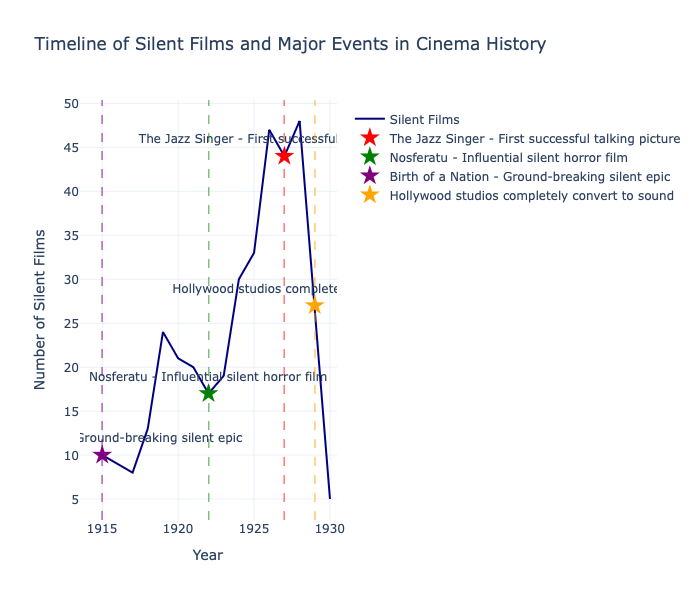

In [10]:
# Group by year and count number of Silent film for each year of the period 1
df = pd.DataFrame(df_period1[df_period1["Genre_Silent film"]==True].groupby("Year").apply(lambda x: x["Genre_Silent film"].sum(),include_groups=False),columns=["count"]).reset_index()

# Create the events data
events = {
    1927: {'text': 'The Jazz Singer - First successful talking picture', 'color': 'red'},
    1922: {'text': 'Nosferatu - Influential silent horror film', 'color': 'green'},
    1915: {'text': 'Birth of a Nation - Ground-breaking silent epic', 'color': 'purple'},
    1929: {'text': 'Hollywood studios completely convert to sound', 'color': 'orange'}
}

# Create the main line plot
fig = go.Figure()

# Add the silent films line
fig.add_trace(
    go.Scatter(
        x=df['Year'],
        y=df['count'],
        mode='lines',
        name='Silent Films',
        line=dict(color='navy', width=2)
    )
)

# Add event markers
for year, event in events.items():
    fig.add_trace(
        go.Scatter(
            x=[year],
            y=[df[df['Year'] == year]['count'].values[0]],
            mode='markers+text',
            name=event['text'],
            marker=dict(
                symbol='star',
                size=15,
                color=event['color']
            ),
            text=event['text'],
            textposition='top center',
            hoverinfo='text+x+y',
            showlegend=True
        )
    )

# Add vertical lines for events
for year, event in events.items():
    fig.add_vline(
        x=year,
        line_dash="dash",
        line_color=event['color'],
        opacity=0.5
    )

# Update layout
fig.update_layout(
    title='Timeline of Silent Films and Major Events in Cinema History',
    xaxis_title='Year',
    yaxis_title='Number of Silent Films',
    hovermode='closest',
    template='plotly_white',
    showlegend=True,
    legend=dict(
        yanchor="top",
        y=0.99,
        xanchor="left",
        x=1.05
    ),
    margin=dict(r=200)  # Add right margin for legend
)

# Make it responsive
fig.update_layout(
    autosize=True,
    width=1000,
    height=600
)

# Show the plot
fig.show()

fig.write_html("plots/timeline_chapter1.html")

Thus, the Jazz Singer is indeed a game-changer for the cinema-industry as it is the beginning of a whole new era and the apparition of sound will have others consequences on movies features that we will see later.

2. **The Global Impact of World Cinema**

As we observed earlier, silent films dominated the cinematic landscape for the majority of this period. However, with the advent of sound in cinema and the release of the first "talkies," a significant shift began to take shape. This era saw the rise of well-defined genres such as Drama, Comedy, and Musical, which flourished alongside the new possibilities introduced by sound.

Notably, the World Cinema genre achieved exceptional critical acclaim during 1915–1930. This success can be attributed to groundbreaking innovations in filmmaking, the transformative power of talkies, and the emergence of unique cinematic styles that redefined storytelling. These developments not only enriched the cinematic experience but also laid the foundation for the global diversity of film that we celebrate today.

In [11]:
def top_10_(df,feature):
    top30_ = df.sort_values(by="averageRating",ascending=False).head(30)
    
    top10 = top30_[[x for x in top30_.columns if x.startswith(feature)]].sum(axis=0).sort_values(ascending=False).head(10)
    return top10

print("Top 10 most frequent genres in the 30 highest-rated movies :")
top = top_10_(df_period1,'Genre_')
display(top)

Top 10 most frequent genres in the 30 highest-rated movies :


Genre_Drama              29
Genre_Black-and-white    27
Genre_Silent film        26
Genre_Romance            11
Genre_Comedy              9
Genre_World cinema        8
Genre_War                 7
Genre_Action              7
Genre_Adventure           5
Genre_Horror              4
dtype: int64

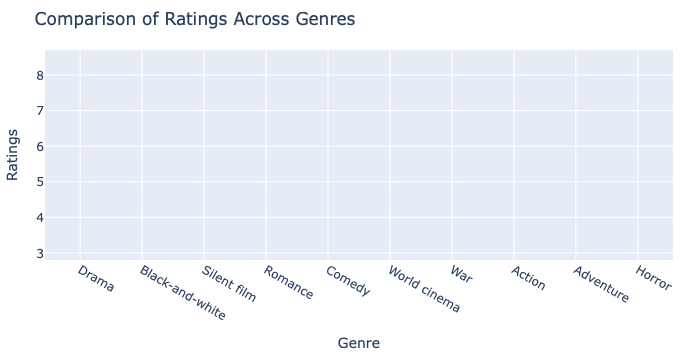

In [12]:
# Select only the top 10 most present genre in top 30 highly rated movies
df = df_period1[[x for x in top.index.to_list()]+['averageRating']]

# Melt the dataset to a long format for easier visualization
df_long = df.melt(id_vars=['averageRating'], 
                  value_vars=[x for x in top.index.to_list()], 
                  var_name="Genre", 
                  value_name="Belongs_To_Genre")

# Filter only rows where the movie belongs to a genre (value == 1)
df_long = df_long[df_long["Belongs_To_Genre"] == True]
df_long["Genre"] = df_long["Genre"].apply(lambda x : x.replace("Genre_",""))

# Calculate mean ratings for each genre
mean_ratings = df_long.groupby('Genre')['averageRating'].mean().reset_index()
# Create the scatter plot
fig = px.scatter(df_long, x="Genre", y="averageRating", 
                color="Genre", 
                title="Comparison of Ratings Across Genres", 
                labels={"averageRating": "Ratings", "Genre": "Genre"}, 
                hover_data=["averageRating"])

# Update layout for better aesthetics
fig.update_layout(
    showlegend=False,
    margin=dict(t=50, l=25, r=25, b=25)
)

fig.show()
fig.write_html("plots/ratings_comparison_chapter1.html")

The distribution plot reveals a fascinating insight into the performance of film genres during this period. While the "World Cinema" genre may not dominate in sheer numbers among the top 30 highest-rated movies, its presence is exceptional in terms of quality. Every movie in this genre consistently achieves a higher average rating compared to films in other genres.

This indicates that "World Cinema" films, though fewer in number, stand out for their storytelling depth, artistic innovation, and cultural impact. These films resonated profoundly with audiences and critics alike, setting a benchmark for quality and creativity that other genres struggled to match during this period. This trend underscores the genre's pivotal role in shaping cinema as a truly global art form.

# 1930 - 1950 (Hollywood's Golden Age)

The Golden Age of Hollywood (1930–1950) represents a transformative period in cinema history, marked by technical, cultural, and financial breakthroughs. Our analysis, supported by four key plots, illustrates how this era redefined the film industry and its global impact. By combining findings from data analysis, revenue trends, and historical context, we uncovered fascinating insights that highlight the defining characteristics of this era.

In [13]:
# we define the variable period1 and take only the films concerning this period from 
# the original datasets

period2 = periods[1]
df_period2 = movies_clean[movies_clean["Year_Interval"] == period2]

1. **Hollywood’s Dominance and International Contributions**

By analyzing production trends by country and cross-referencing with critical ratings, we uncovered the stark disparity in output while also identifying the unique influence of non-Hollywood cinema.

Our plot illustrates Hollywood’s dominance during the Golden Age, with the United States producing over 80% of global films from 1930–1950. The United Kingdom, Japan, France, and Italy collectively contributed less than 20%. Despite this, international movements like Italian Neorealism and the work of Akira Kurosawa challenged Hollywood’s monopoly.

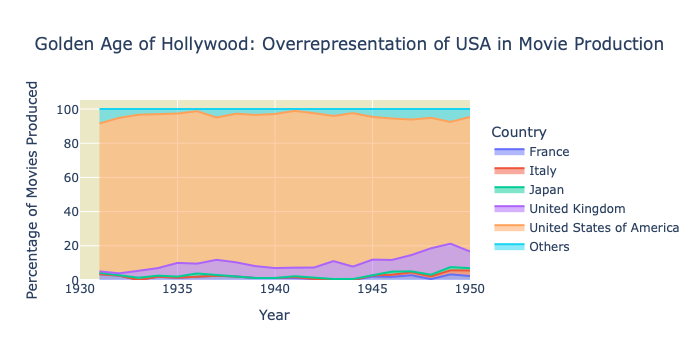

In [14]:
# Melt the binary columns to create a 'Country' column with corresponding values
country_columns = [col for col in df_period2.columns if col.startswith('Country_')]
df_melted = df_period2.melt(
    id_vars=['Year'], 
    value_vars=country_columns, 
    var_name='Country', 
    value_name='Movie_Count'
)

# Keep only rows where Movie_Count is 1 (indicating that a movie was produced in that country)
df_melted = df_melted[df_melted['Movie_Count'] == 1]

# Count the number of movies per country per year
df_grouped = df_melted.groupby(['Year', 'Country']).size().reset_index(name='Movie_Count')

# Calculate the total number of movies per year and percentages per country
df_grouped['Total_Per_Year'] = df_grouped.groupby('Year')['Movie_Count'].transform('sum')
df_grouped['Percentage'] = (df_grouped['Movie_Count'] / df_grouped['Total_Per_Year']) * 100

# Combine smaller countries into an "Others" category (countries outside of the top 5 biggest producer)
top5_producer = df_grouped.groupby('Country').apply(lambda x: x["Percentage"].mean(),include_groups=False).sort_values(ascending=False).head(6).index.to_list()

df_grouped['Country'] = df_grouped.apply(
    lambda row: row['Country'] if row['Country'] in top5_producer and row['Country']!='Country_Other' else 'Others', axis=1
)

# Recalculate percentages after combining smaller countries into "Others"
df_grouped = df_grouped.groupby(['Year', 'Country']).agg(
    {'Movie_Count': 'sum', 'Total_Per_Year': 'first'}
).reset_index()
df_grouped['Percentage'] = (df_grouped['Movie_Count'] / df_grouped['Total_Per_Year']) * 100

df_grouped.sort_values("Country",inplace=True)
df_grouped["Country"] = df_grouped["Country"].apply(lambda x: x.replace("Country_",""))

# Plot the stacked area chart
fig = px.area(
    df_grouped,
    x='Year',
    y='Percentage',
    color='Country',
    title='Golden Age of Hollywood: Overrepresentation of USA in Movie Production',
    labels={'Percentage': 'Percentage of Movies Produced', 'Year': 'Year', 'Country': 'Country'},
)

# Highlight the Golden Age of Hollywood (1930-1950) with a shaded background
fig.add_vrect(
    x0=1930, x1=1950,
    fillcolor="gold", opacity=0.2,
    layer="below", line_width=0,
)

# Update layout for better visuals
fig.update_layout(
    xaxis_title="Year",
    yaxis_title="Percentage of Movies Produced",
    legend_title="Country",
    legend=dict(
        orientation="v", 
        yanchor="middle", 
        y=0.5,             
        xanchor="left",    
        x=1.05             
    ),
)

# Show the plot
fig.show()

fig.write_html("plots/film_production_chapter2.html")

While Hollywood produced the vast majority of films, groundbreaking contributions from Italian and Japanese filmmakers redefined global cinema. Italian Neorealism’s raw, emotional storytelling and Kurosawa’s universal themes laid the groundwork for future international recognition in cinema.

2. **Decline in Genre and Language Diversity**

Through correlation analysis, we observed this sharp decline by comparing films’ genre and language data across periods. This shift aligns with the introduction of sound and Hollywood’s emphasis on streamlined production for mass appeal.

In [15]:
print("Stats on the period 1915-1930 :")
display(df_period1["nb_of_Languages"].describe())
display(df_period1["nb_of_Genres"].describe())

print("\nStats on the period 1930-1950 :")
display(df_period2["nb_of_Languages"].describe())
display(df_period2["nb_of_Genres"].describe())

Stats on the period 1915-1930 :


count    541.000000
mean       1.556377
std        0.546928
min        1.000000
25%        1.000000
50%        2.000000
75%        2.000000
max        4.000000
Name: nb_of_Languages, dtype: float64

count    541.000000
mean       4.364140
std        2.130582
min        1.000000
25%        3.000000
50%        4.000000
75%        6.000000
max       14.000000
Name: nb_of_Genres, dtype: float64


Stats on the period 1930-1950 :


count    3259.000000
mean        1.067199
std         0.305607
min         1.000000
25%         1.000000
50%         1.000000
75%         1.000000
max         4.000000
Name: nb_of_Languages, dtype: float64

count    3259.000000
mean        3.780608
std         1.970947
min         1.000000
25%         2.000000
50%         4.000000
75%         5.000000
max        11.000000
Name: nb_of_Genres, dtype: float64

The second plot highlights a noticeable decline in the diversity of genres and languages per movie during the Golden Age. Silent films from the earlier period averaged 4.4 genres per movie and 1.55 languages, while sound films from 1930–1950 dropped to 3.8 genres and 1.06 languages.

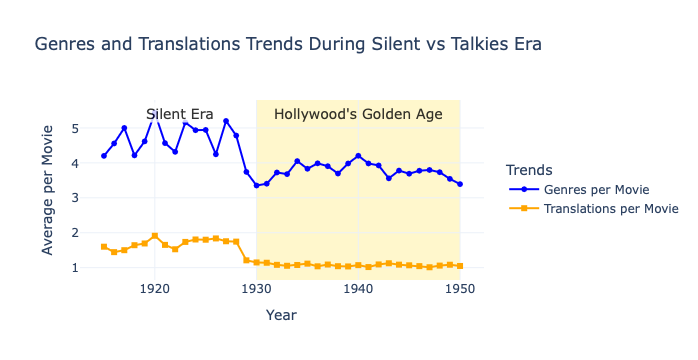

In [16]:
periods_1_2 = [period1,period2]

# Select movies of the original dataset in both period 1 and 2
df = movies_clean[movies_clean["Year_Interval"].isin(periods_1_2)]

# Aggregate trends for plotting
df_grouped = df.groupby(['Year', 'Year_Interval'])[['nb_of_Genres', 'nb_of_Languages']].mean().reset_index()

# Create the simplified dual plot
fig = go.Figure()

# Single line for Number of Genres per Movie
fig.add_trace(go.Scatter(
    x=df_grouped['Year'],
    y=df_grouped['nb_of_Genres'],
    mode='lines+markers',
    name='Genres per Movie',
    line=dict(color='blue'),
    marker=dict(symbol='circle')
))

# Single line for Number of Translations per Movie
fig.add_trace(go.Scatter(
    x=df_grouped['Year'],
    y=df_grouped['nb_of_Languages'],
    mode='lines+markers',
    name='Translations per Movie',
    line=dict(color='orange'),
    marker=dict(symbol='square')
))

# Highlight the Silent Era (1915-1930) with a shaded background
fig.add_vrect(
    x0=1915, x1=1930,
    fillcolor="white", opacity=0.2,
    layer="below", line_width=0,
)

# Highlight the Golden Age of Hollywood (1930-1950) with a shaded background
fig.add_vrect(
    x0=1930, x1=1950,
    fillcolor="gold", opacity=0.2,
    layer="below", line_width=0,
)

# Add annotations for the Silent Era and Golden Age
fig.add_annotation(
    x=1922.5, y=max(df_grouped['nb_of_Genres']),
    text="Silent Era",
    showarrow=False,
    font=dict(size=14, color="black"),
    bgcolor="white",
    opacity=0.8
)
fig.add_annotation(
    x=1940, y=max(df_grouped['nb_of_Genres']),
    text="Hollywood's Golden Age",
    showarrow=False,
    font=dict(size=14, color="black"),
    opacity=0.8
)

# Add titles and labels
fig.update_layout(
    title="Genres and Translations Trends During Silent vs Talkies Era",
    xaxis_title="Year",
    yaxis_title="Average per Movie",
    legend_title="Trends",
    legend=dict(
        orientation="v",  
        yanchor="middle",  
        y=0.5,             
        xanchor="left",    
        x=1.05             
    ),
    template="plotly_white"
)

# Show the plot
fig.show()

fig.write_html("plots/film_genres_languages_chapter2.html")

The advent of sound reshaped global cinema, as spoken dialogue required significant investments in dubbing, subtitling, or reshooting. To mitigate costs, Hollywood focused on single-genre productions, meeting the constraints of the Hays Code and creating iconic films tailored to specific audiences, like musicals and war dramas.

3. **The Financial Triumph of Snow White and the Seven Dwarfs**

By analyzing adjusted box office data, we identified a peak in 1937 and 1939 as the highest-grossings films of all time, illustrating the era’s capacity for massive financial success. We thus identified thos two peaks as being respectively "Snow White and the Seven Dwarfs", and "Gone with the Wind".

/var/folders/gc/k740v3612cv_1m5s2d93wxzr0000gn/T/ipykernel_20364/3001379610.py:8: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.



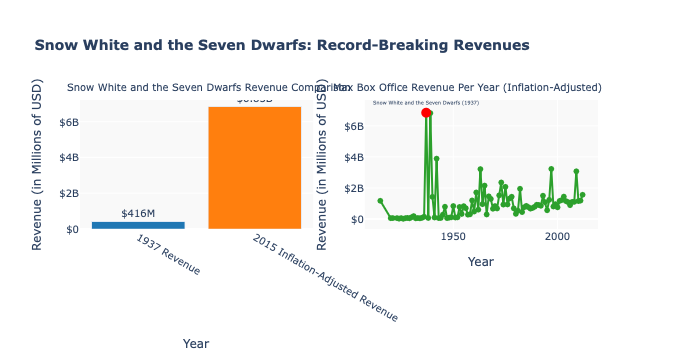

In [17]:
# We need the whole datahat set here as we want to prove that "Snow White and the Seven
# Dwarfs" is the highest grossing film of all time
df_mod_clean = movies_clean.dropna(subset='Movie_box_office_revenue')

cpi = pd.read_csv("./data/CPI.csv")
# We choose the series_id "CUUR0000SA0" of the CPI dataset as it is a Consumer Price 
# Index meabased on the average of the whole US cities.
cpi = pd.DataFrame(cpi[cpi["series_id"]=="CUUR0000SA0"][cpi["period"]=="M13"].set_index("year").value)

#We set the base year in 2015 to compute our inflation-adjusted revenue
base_cpi = cpi.loc[2015].values[0]

# We merge our original dataframe and the dataframe containg the CPI index for each year
df_mod_cpi = df_mod_clean.merge(cpi,left_on='Year',right_on='year',how='left')

# We computed the Adjusted Revenue_year_i = Revenue_year_i * (CPI_2015)/(CPI_year_i)
df_mod_cpi['Adjusted_Revenue'] = df_mod_cpi['Movie_box_office_revenue']*(base_cpi/df_mod_cpi['value'])

# We save the highest grossing film of each year in history of cinema 
max_rev_per_year = pd.DataFrame(df_mod_cpi.groupby('Year').apply(lambda x: x['Adjusted_Revenue'].max(),include_groups=False),columns=['Max_Revenue']).reset_index()

# We save the original and adjusted revenue of "Snow White and the Seven Dwarfs" to highlight it in the plot
value_1937 = df_mod_cpi[df_mod_cpi["Movie_name"]=="Snow White and the Seven Dwarfs"]["Movie_box_office_revenue"].values[0]
value_2015 = df_mod_cpi[df_mod_cpi["Movie_name"]=="Snow White and the Seven Dwarfs"]["Adjusted_Revenue"].values[0]
text_1937 = f"${round(value_1937/1000000)}M"
text_2015 = f"${round(value_2015/1000000000,2)}B"

# Create a bar chart
fig1 = go.Figure()

# Add bars
fig1.add_trace(go.Bar(
    x=["1937 Revenue", "2015 Inflation-Adjusted Revenue"],
    y=[value_1937, value_2015],
    text=[text_1937, text_2015],
    textposition='outside',
    marker=dict(color=["#1f77b4", "#ff7f0e"])
))

# Customize layout
fig1.update_layout(
    title="<b>Revenue of Snow White and the Seven Dwarfs: Original vs Inflation-Adjusted</b>",
    xaxis_title="Revenue Type",
    yaxis_title="Revenue (in Millions of USD)",
    yaxis=dict(tickprefix="$"),
    plot_bgcolor="#f9f9f9",
    font=dict(size=14),
    annotations=[
        dict(
            x=0, y=value_1937 + 100,
            text="Record-breaking in 1937!",
            showarrow=True,
            arrowhead=2, arrowcolor="#1f77b4",
            ax=20, ay=-40
        ),
        dict(
            x=1, y=value_2015 + 200,
            text="Highest-grossing film (inflation-adjusted)",
            showarrow=True,
            arrowhead=2, arrowcolor="#ff7f0e",
            ax=-40, ay=-80
        )
    ]
)

# Second plot : max inflation-adjusted revenue per year
fig2 = go.Figure()
fig2.add_trace(go.Scatter(
    x=max_rev_per_year["Year"],
    y=max_rev_per_year["Max_Revenue"],
    mode="lines+markers",
    line=dict(color="#2ca02c"),
    name="Max Revenue"
))
fig2.add_trace(go.Scatter(
    x=[1937],
    y=[value_2015],
    mode="markers+text",
    marker=dict(size=10, color="red"),
    text=["Snow White and the Seven Dwarfs (1937)"],
    textposition="top center",
    textfont=dict(size=5),
    name="Snow White and the Seven Dwarfs"
))
fig2.update_layout(
    title="Max Box Office Revenue Per Year (1915–2015, Adjusted)",
    xaxis_title="Year",
    yaxis_title="Revenue (in Millions of USD)",
    yaxis=dict(tickprefix="$"),
    plot_bgcolor="#f9f9f9",
    font=dict(size=14)
)

combined_fig = make_subplots(rows=1, cols=2, subplot_titles=[
    "Snow White and the Seven Dwarfs Revenue Comparison",
    "Max Box Office Revenue Per Year (1915–2015, Adjusted)"
])

# Add plots to the subplots
combined_fig.add_trace(fig1.data[0], row=1, col=1)  # First plot
for trace in fig2.data:  # Second plot (with multiple traces)
    combined_fig.add_trace(trace, row=1, col=2)


# Update layout for the combined figure
combined_fig.update_layout(
    title_text="<b>Snow White and the Seven Dwarfs: Record-Breaking Revenues</b>",
    showlegend=False,
    plot_bgcolor="#f9f9f9",
    font=dict(size=10),
    annotations=[dict(
        font=dict(size=10),
        showarrow=False,
        xref="paper", yref="paper",
        x=0.25, y=1.05, 
        text="Snow White and the Seven Dwarfs Revenue Comparison",
    ),
    dict(
        font=dict(size=10), 
        showarrow=False,
        xref="paper", yref="paper",
        x=0.75, y=1.05,  
        text="Max Box Office Revenue Per Year (Inflation-Adjusted)",
    )],
    xaxis1=dict(title="Year"),  
    yaxis1=dict(title="Revenue (in Millions of USD)", tickprefix="$"),
    xaxis2=dict(title="Year"),
    yaxis2=dict(title="Revenue (in Millions of USD)", tickprefix="$")
)

# Show the combined plot
combined_fig.show()

combined_fig.write_html("plots/revenue_record_chapter2.html")

The first chart showcases Snow White and the Seven Dwarfs as a defining example of the Golden Age’s financial achievements. Released in 1937, the film’s global revenue of $416 million ($6.85 billion in 2015-adjusted dollars) highlights the unmatched success of Hollywood’s genre-focused studio system. 

It is even more appelaing on the second plot when we realise that is indeed the highest grossing film of all time. This plot reveals the strategic dominance of major studios like Disney, MGM, and Warner Bros., whose streamlined production methods maximized both cultural and financial impact.

4. **Cinema as an Escape During the Great Depression**

The financial constraints of the time pushed studios to create highly entertaining, visually stunning productions that offered hope and optimism. This trend directly connects with the popularity of genres such as musicals and screwball comedies during the Golden Age.

The third plot delves into the cultural context of the 1930s, showing how films like Top Hat provided audiences with a vital escape during the Great Depression. Affordable ticket prices and uplifting musicals dominated this era, allowing people to temporarily forget the economic hardships they faced.

/var/folders/gc/k740v3612cv_1m5s2d93wxzr0000gn/T/ipykernel_20364/591065149.py:4: DeprecationWarning:

DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.

/var/folders/gc/k740v3612cv_1m5s2d93wxzr0000gn/T/ipykernel_20364/591065149.py:5: DeprecationWarning:

DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.

/var/folders/gc/k740v3612cv_1m5s2d93wxzr0000gn/T/ipykernel_20364/591065149.py:6: DeprecationWarning:

DataFrameGroupBy.apply operated on the grouping column

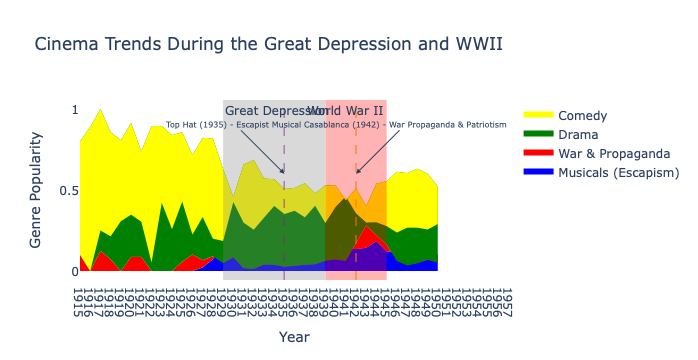

In [20]:
periods_1_2 = [period1,period2]
df_advc = movies_clean[movies_clean["Year_Interval"].isin(periods_1_2)]
df = pd.DataFrame()
df["musicals"] = df_advc.groupby("Year").apply(lambda x: x["Genre_Musical"].mean())
df["war_propaganda"] = df_advc.groupby("Year").apply(lambda x: x["Genre_War"].mean())
df["drama"] = df_advc.groupby("Year").apply(lambda x: x["Genre_Drama"].mean())
df["comedy"] = df_advc.groupby("Year").apply(lambda x: x["Genre_Comedy"].mean())
df = df.reset_index()
# Plot
fig = go.Figure()

# Stack genres to show relative proportions
fig.add_trace(go.Scatter(
    x=df['Year'],
    y=df['musicals'],
    fill='tonexty',
    mode='none',
    name='Musicals (Escapism)',
    fillcolor='blue'
))

fig.add_trace(go.Scatter(
    x=df['Year'],
    y=df['war_propaganda'],
    fill='tonexty',
    mode='none',
    name='War & Propaganda',
    fillcolor='red'
))

fig.add_trace(go.Scatter(
    x=df['Year'],
    y=df['drama'],
    fill='tonexty',
    mode='none',
    name='Drama',
    fillcolor='green'
))

fig.add_trace(go.Scatter(
    x=df['Year'],
    y=df['comedy'],
    fill='tonexty',
    mode='none',
    name='Comedy',
    fillcolor='yellow'
))

# Add annotations for key films
fig.add_annotation(
    x=1935, y=0.6,
    text="Top Hat (1935) - Escapist Musical",
    font=dict(size=8),
    showarrow=True,
    arrowhead=2,
    ax=-50,
    ay=-50
)

fig.add_annotation(
    x=1942, y=0.6,
    text="Casablanca (1942) - War Propaganda & Patriotism",
    font=dict(size=8),
    showarrow=True,
    arrowhead=2,
    ax=50,
    ay=-50
)

fig.add_vline(
        x=1935,
        line_dash="dash",
        line_color="purple",
        opacity=0.5
)

fig.add_vline(
        x=1942,
        line_dash="dash",
        line_color="orange",
        opacity=0.5
)

# Highlight the Great Depression period (1929–1939)
fig.add_vrect(
    x0=1929, x1=1939,
    annotation_text="Great Depression",
    annotation_position="top left",
    fillcolor="grey", opacity=0.3,
    line_width=0,
)

# Highlight the WWII period (1939–1945)
fig.add_vrect(
    x0=1939, x1=1945,
    annotation_text="World War II",
    annotation_position="top right",
    fillcolor="red", opacity=0.3,
    line_width=0,
)

# Update layout for better readability
fig.update_layout(
    title="Cinema Trends During the Great Depression and WWII",
    xaxis_title="Year",
    yaxis_title="Genre Popularity",
    showlegend=True,
    xaxis=dict(tickmode='linear', tick0=1930, dtick=1),
    plot_bgcolor='white'
)

# Show plot
fig.show()

fig.write_html("plots/theme_evolution_chapter2.html")

# 1950-1970 (Auteur Rise)

The 1950-1970 period was pivotal in reshaping global cinema, driven by cultural shifts, post-WWII reconstruction, and the increasing interconnection of the world. In this discussion, we highlight the key trends through four visualizations that reveal how the film industry transitioned during this transformative era.

In [21]:
period3 = periods[2]
df_period3 = movies_clean[movies_clean["Year_Interval"]==period3]

1. **International Collaborations: A Global Cinematic Network**

We noticed the growth in co-production of movies, indeed, the number of Country per movie feature increased compare to the previous period.

This chart highlights the growing trend of coproductions between countries, such as the United States and the United Kingdom, and France and Italy. The thicker lines represent stronger, more frequent partnerships, showcasing the importance of shared cultural and economic interests in filmmaking.

Japan began forming significant collaborations with Western countries, helping to introduce their distinct cinematic style to a global audience

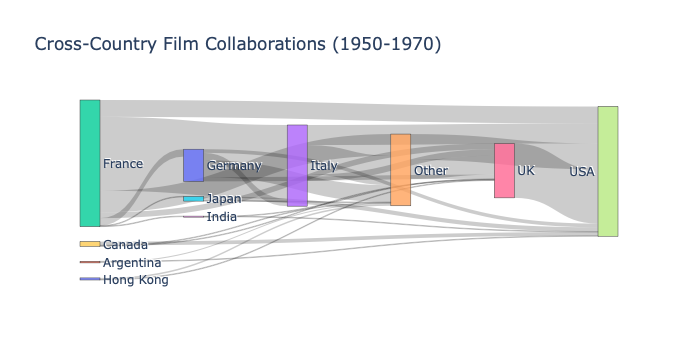

In [22]:
# Find pairs of countries involved in the same movie
df = df_period3[[x for x in df_period3.columns if x.startswith("Country_")]]
co_prod = []
countries = df.columns
for _, row in df.iterrows():
    involved_countries = countries[row == 1]
    pairs = [(c1, c2) for i, c1 in enumerate(involved_countries) for c2 in involved_countries[i+1:]]
    co_prod.extend(pairs)

# Create a DataFrame with counts of each pair
co_prod_df = pd.DataFrame(co_prod, columns=['country_1', 'country_2'])
co_prod_df = co_prod_df.groupby(['country_1', 'country_2']).size().reset_index(name='count')

# Create the Sankey plot
unique_countries = list(set(co_prod_df['country_1']).union(set(co_prod_df['country_2'])))

shortened_labels = ["USA" if label=="Country_United States of America" else "UK" if label=="Country_United Kingdom" else label.replace("Country_","") for label in unique_countries]

fig = go.Figure(go.Sankey(
    node=dict(
        pad=15,
        thickness=20,
        label=shortened_labels
    ),
    link=dict(
        source=[unique_countries.index(c1) for c1 in co_prod_df['country_1']],
        target=[unique_countries.index(c2) for c2 in co_prod_df['country_2']],
        value=co_prod_df['count']
    )
))

fig.update_layout(title_text="Cross-Country Film Collaborations (1950-1970)", font_size=12)
fig.show()

fig.write_html("plots/films_collaborations_chapter3.html")

The post-war era saw nations leveraging film as a means of cultural diplomacy, promoting their national stories globally while also benefiting from joint financing. This international collaboration was not only a financial strategy but a cultural one, shaping global cinematic narratives.

2. **Genre Diversity: How Countries Expanded and Blended Genres**

Hollywood remained dominant in genres like action and drama, but other countries explored new genre blends. Japanese cinema, for example, blended samurai epics with psychological themes, thanks to directors like Akira Kurosawa. French cinema delved into introspective crime films, breaking conventional genre boundaries.

This visualization shows how diverse storytelling emerged globally, with many filmmakers experimenting with genre fusion to reflect complex societal themes.

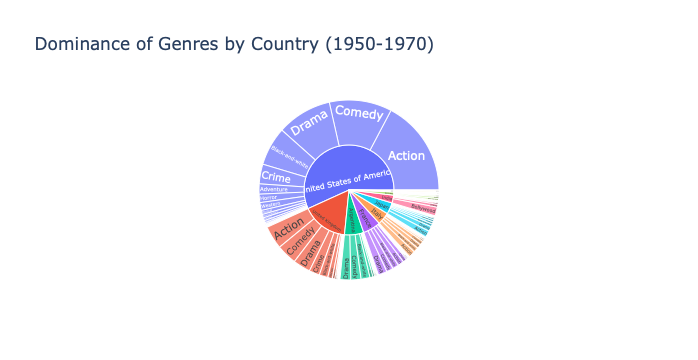

In [23]:
df = df_period3.copy()
# Sum the values for each genre-country pair
genre_country = df.groupby([col for col in df.columns if col.startswith('Country_') and not col=="Country_Other"] + 
                           [col for col in df.columns if col.startswith('Genre_') and not col=="Genre_Other" ]).size().reset_index(name='count')

# Create a new column for country names and genre names for better visualization
genre_country['country'] = genre_country[[col for col in genre_country.columns if col.startswith('Country_')]].idxmax(axis=1).str.replace('Country_', '')
genre_country['genre'] = genre_country[[col for col in genre_country.columns if col.startswith('Genre_')]].idxmax(axis=1).str.replace('Genre_', '')

# Now, we can plot the data with the sunburst chart
fig = px.sunburst(
    genre_country,
    path=['country', 'genre'],
    values='count',
    title="Dominance of Genres by Country (1950-1970)"
)
fig.show()
fig.write_html("plots/genre_by_country_chapter3.html")

This period marked a turning point in how genres were perceived. It wasn’t just about formulaic storytelling anymore; filmmakers started blending genres to express more complex, nuanced narratives. International collaborations further amplified this blending of cinematic traditions.


3. **The Rise of Multilingual Film Production**

The data reveals an upward trend in multilingual film productions during the 1960s, especially among European filmmakers. This reflects the increasing interconnectedness of the world post-WWII and the need for films to appeal to diverse international markets.

Festivals like Cannes played a crucial role in elevating these films, providing a platform for filmmakers to showcase their multicultural narratives.

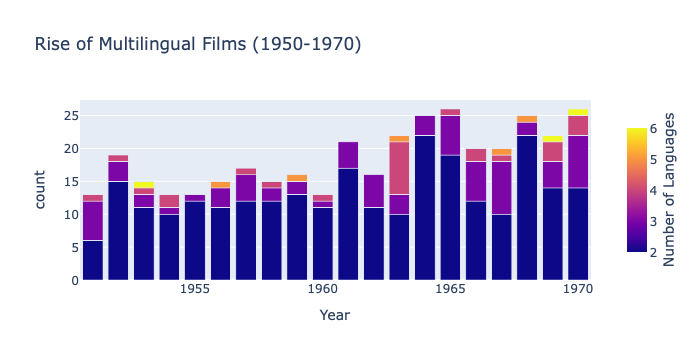

In [25]:
# Group by year and count multilingual films
languages_per_year = df_period3.groupby(['Year', 'nb_of_Languages']).size().reset_index(name='count')

# Create the bar chart
fig = px.bar(
    languages_per_year[languages_per_year["nb_of_Languages"] != 1],
    x='Year',
    y='count',
    color='nb_of_Languages',
    labels={'nb_of_Languages': 'Number of Languages'},
    title="Rise of Multilingual Films (1950-1970)"
)

# Update the color bar position and rotate the title
fig.update_layout(
    coloraxis_colorbar=dict(
        title="Number of Languages",
        title_side="right",  
        orientation="v",  
        thickness=20,  
        len=0.8,  
        x=1.05, 
        y=0.5, 
    )
)

fig.show()

# Save the plot
fig.write_html("plots/rise_of_languages_chapter3.html")


The rise in multilingual films was more than just a commercial strategy; it was a reflection of a world becoming more interconnected. These films offered audiences a window into different cultures, while also reflecting the era’s complexity and the globalizing nature of cinema.


4. **Global Genre Experimentation and Cinematic Art**

This chart compares the level of genre experimentation across different regions, highlighting the shift from entertainment-focused cinema to more art-driven approaches. Directors like Jean-Luc Godard in France (*Breathless*) and Akira Kurosawa in Japan (*Seven Samurai*) demonstrated how genres could be bent and redefined to serve deeper artistic and philosophical themes.

Global experimentation also led to the creation of new cinematic movements, such as the French New Wave and Japanese post-war cinema.

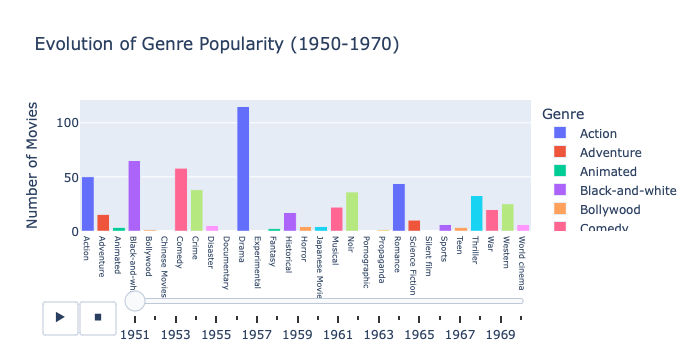

In [26]:
# Group the data by year and each genre column to get the count of movies for each genre
genre_trend = df_period3.groupby('Year')[[col for col in df.columns if col.startswith('Genre_')]].sum().reset_index()

# Reshape the data to make it compatible with the bar plot (melt it into a long format)
genre_trend = genre_trend.melt(id_vars=['Year'], var_name='Genre', value_name='count')

# Filter out rows where count is 0 (since it won't be relevant for the plot)
genre_trend = genre_trend[genre_trend['count'] > 0]
genre_trend['Genre'] = genre_trend['Genre'].apply(lambda x: x.replace("Genre_", ""))

# Create the bar plot
fig = px.bar(
    genre_trend,
    x='Genre',
    y='count',
    color='Genre',
    animation_frame='Year',
    title="Evolution of Genre Popularity (1950-1970)",
    labels={'count': 'Number of Movies', 'Genre': 'Genre'}
)

# Update the animation speed and remove 'Year=' text above slider
fig.update_layout(
    updatemenus=[dict(
        type='buttons',
        showactive=False,
        buttons=[dict(
            method='animate',
            args=[None, dict(
                frame=dict(duration=2000, redraw=True),  # Duration of each frame
                fromcurrent=True,
                mode='immediate',
                transition=dict(duration=500, easing='cubic-in-out')
            )]
        )]
    )],
    xaxis_title=None,  # Remove the x-axis title
    xaxis=dict(
        tickfont=dict(size=8)  # Adjust font size for x-axis labels
    ),
    sliders=[dict(
        currentvalue=dict(visible=False),  # Hide 'Year=xxxx' above the slider
        transition=dict(duration=500)
    )]
)

fig.show()
fig.write_html("plots/genre_diversification_per_year_chapter3.html")

By the 1960s, cinema had transcended its role as mere entertainment. It became a medium for deep cultural commentary, artistic expression, and personal statements. The rise of experimental films reflected a broader societal transformation, where cinema was now seen as a vehicle for challenging traditional norms.

# 1970-2000 (Blockbuster Era)

The 1970-2000 period marked the transformation of cinema into a global cultural force. The rise of hybrid genres, the international success of blockbuster films, and the evolution of seasonal releases fundamentally reshaped the film industry. The exploration of these themes reveals how Hollywood's strategic blending of genres and marketing innovations led to the global dominance of cinema.


In [27]:
period4 = periods[3]
df_period4 = movies_clean[movies_clean["Year_Interval"] == period4]
df_period_season4 = movies_season[movies_season["Year_Interval"] == period4]

1. **Hybrid Genre Evolution: A New Direction in Filmmaking**

The graph shows the growing connections between genres such as Action, Sci-Fi, and Comedy. Notably, the fusion of genres like Action-Sci-Fi (e.g., *The Matrix*, *Terminator 2*) and Action-Comedy (e.g., *Ghostbusters*, *Men in Black*) created new, cross-genre films that attracted diverse audiences.
  
These hybrid genres allowed filmmakers to appeal to fans of multiple genres, creating a broader and more global fanbase.

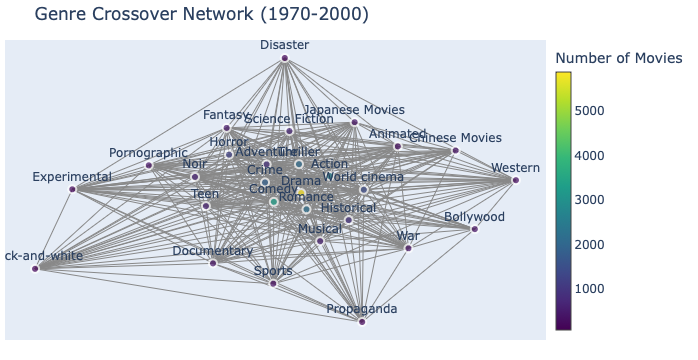

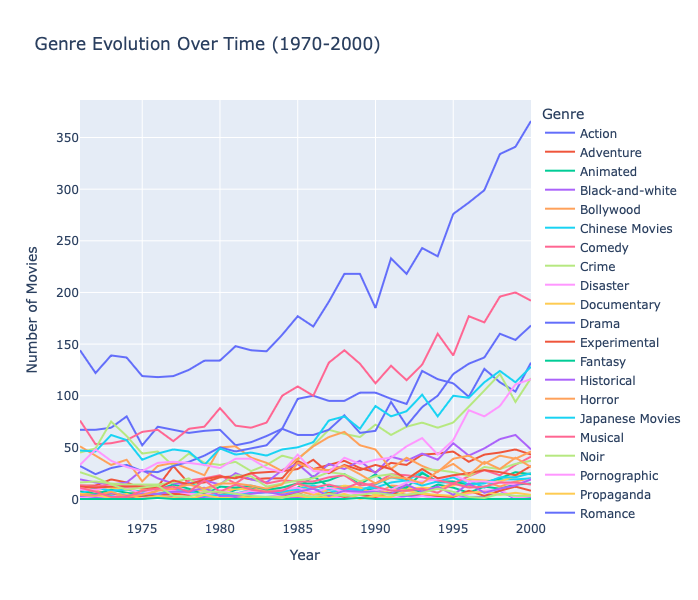

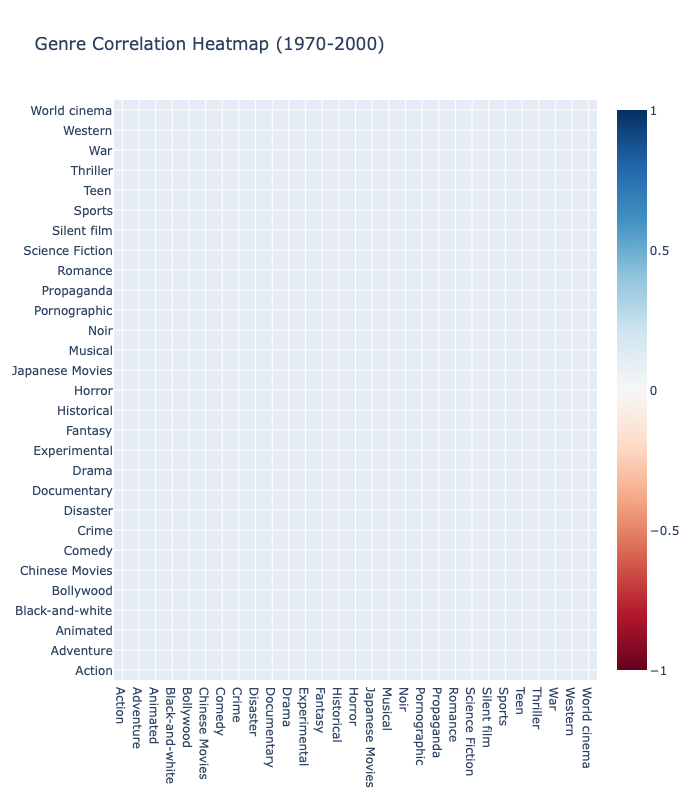

In [28]:
# Create genre network analysis
def create_genre_network(df):
    genre_pairs = []
    genre_counts = {}
    
    for _, row in df.iterrows():
        # Get genres for the movie (0s and 1s indicating genre presence)
        genres = [col.replace("Genre_","") for col in df.columns if col.startswith('Genre_') and row[col] == 1 and not col=="Genre_Silent film"]
        # Count individual genres
        for genre in genres:
            if genre not in genre_counts:
                genre_counts[genre] = 0
            genre_counts[genre] += 1
        
        # Count genre pairs (if more than one genre is present for a movie)
        if len(genres) > 1:
            for i in range(len(genres)):
                for j in range(i + 1, len(genres)):
                    genre_pairs.append((genres[i], genres[j]))
    
    # Count pair frequencies
    pair_counts = pd.Series(genre_pairs).value_counts()
    
    # Create a networkx graph
    G = nx.Graph()
    
    # Add nodes (genres) to the graph with their size (frequency of occurrence)
    for genre, count in genre_counts.items():
        G.add_node(genre, size=count)
    
    # Add edges (connections between genres) with weights (frequency of co-occurrence)
    for (genre1, genre2), count in pair_counts.items():
        G.add_edge(genre1, genre2, weight=count)
    
    return G

# Create genre network visualization using Plotly
def create_genre_network_viz(G):
    pos = nx.spring_layout(G, k=1, iterations=50)
    
    # Create edge trace
    edge_x = []
    edge_y = []
    edge_weights = []
    
    for edge in G.edges(data=True):
        x0, y0 = pos[edge[0]]
        x1, y1 = pos[edge[1]]
        edge_x.extend([x0, x1, None])
        edge_y.extend([y0, y1, None])
        edge_weights.append(edge[2]['weight'])
    
    edge_trace = go.Scatter(
        x=edge_x, y=edge_y,
        line=dict(width=1, color='#888'),
        hoverinfo='none',
        mode='lines')
    
    # Create node trace
    node_x = []
    node_y = []
    node_sizes = []
    node_labels = []
    
    for node in G.nodes():
        x, y = pos[node]
        node_x.append(x)
        node_y.append(y)
        node_sizes.append(G.nodes[node]['size'])
        node_labels.append(node)
    
    node_trace = go.Scatter(
        x=node_x, y=node_y,
        mode='markers+text',
        hoverinfo='text',
        text=node_labels,
        textposition="top center",
        marker=dict(
            showscale=True,
            size=[s / 50 for s in node_sizes],
            sizemode='area',
            sizeref=2.*max(node_sizes)/(40.**2),
            sizemin=4,
            color=node_sizes,
            colorscale='Viridis',
            colorbar=dict(
                title='Number of Movies',
                thickness=15,
                x=1
            ),
            line_width=2))
    
    # Create the figure with edge and node traces
    fig = go.Figure(data=[edge_trace, node_trace])

    # Add layout and customize appearance
    fig.update_layout(
        title='Genre Crossover Network (1970-2000)',
        showlegend=False,
        hovermode='closest',
        margin=dict(b=20, l=5, r=5, t=40),
        annotations=[],
        xaxis=dict(showgrid=False, zeroline=False, showticklabels=False),
        yaxis=dict(showgrid=False, zeroline=False, showticklabels=False)
    )

    return fig
  

# Create genre evolution plot
def create_genre_evolution(df):
    genre_counts = df.groupby('Year')[[col for col in df.columns if col.startswith('Genre_')]].sum().reset_index()
    
    genre_counts_melted = genre_counts.melt(id_vars=['Year'], var_name='Genre', value_name='Count')
    genre_counts_melted["Genre"] = genre_counts_melted["Genre"].apply(lambda x: x.replace("Genre_",""))
    fig = px.line(genre_counts_melted,
                  x='Year',
                  y='Count',
                  color='Genre',
                  title='Genre Evolution Over Time (1970-2000)')
    
    fig.update_layout(
        xaxis_title='Year',
        yaxis_title='Number of Movies',
        legend_title='Genre',
        height=600
    )
    
    return fig
    
# Create genre correlation heatmap
def create_genre_correlation(df):
    genre_columns = [col for col in df.columns if col.startswith('Genre_')]
    
    corr_matrix = df[genre_columns].corr()

    
    fig = go.Figure(data=go.Heatmap(
        z=corr_matrix.values,
        x=[x.replace("Genre_","") for x in corr_matrix.columns],
        y=[x.replace("Genre_","") for x in corr_matrix.columns],
        colorscale='RdBu',
        zmid=0
    ))
    
    fig.update_layout(
        title='Genre Correlation Heatmap (1970-2000)',
        height=800,
        width=800
    )
    
    return fig
    
# Generate and display visualizations
df = df_period4 

# Create individual visualizations
network_fig = create_genre_network_viz(create_genre_network(df))
network_fig.show()
network_fig.write_html("plots/genre_network_chapter4.html")

evolution_fig = create_genre_evolution(df)
evolution_fig.show()

correlation_fig = create_genre_correlation(df)
correlation_fig.show()
correlation_fig.write_html("plots/genre_correlation_chapter4.html")

The rise of hybrid genres was not only a creative innovation but also a response to shifting market demands. By blending popular genres, Hollywood created films that could cater to a wider audience, driving greater box office success globally. 

2. **Rise of Hybrid Genres Movies**

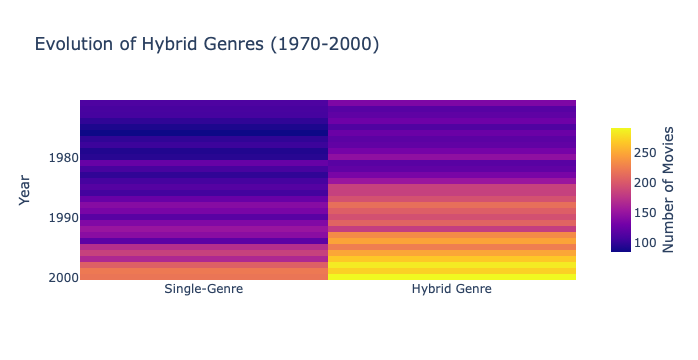

In [29]:
df = df_period4.copy()

df['Hybrid_Genre'] = df['Genre_Action'] + df['Genre_Comedy'] + df['Genre_Science Fiction']

# Group by year and hybrid genre (you can adjust hybrid genre combinations)
hybrid_genre_trend = df.groupby(['Year', 'Hybrid_Genre']).size().reset_index(name='Count')

# Create heatmap plot
fig1 = px.imshow(hybrid_genre_trend.pivot(index='Year', columns='Hybrid_Genre', values='Count'),
                 title="Evolution of Hybrid Genres (1970-2000)",
                 labels={'x': 'Hybrid Genre', 'y': 'Year'})
fig1.update_layout(xaxis_title=None, yaxis_title="Year")

# Update x-axis labels to show "Single-Genre" and "Hybrid Genre"
fig1.update_xaxes(
    tickmode='array',
    tickvals=[False, True],  # The current values of the x-axis
    ticktext=['Single-Genre', 'Hybrid Genre']  # New labels to replace "false" and "true"
)
# Update the color bar position and rotate the title
fig1.update_layout(
    coloraxis_colorbar=dict(
        title="Number of Movies",
        title_side="right",  # Position title to the right
        orientation="v",  # Orient the color bar vertically
        thickness=20,  # Adjust thickness of the color bar
        len=0.8,  # Adjust length of the color bar
        x=1.05,  # Horizontal position (move slightly to the right)
        y=0.5,  # Center it vertically
    )
)
fig1.show()
fig1.write_html("plots/genres_heatmap_chapter4.html")

3. **Global Box Office Map: Hybrid Genres' International Appeal**

This heatmap shows the dominance of action films in Europe, while highlighting how hybrid genres like sci-fi-action and action-comedy had a massive impact in Asia, particularly in Japan and China.

Sci-fi-action films such as *Star Wars* and *The Matrix* transcended their niche appeal and became global phenomena, with spectacular visuals and mainstream action tropes resonating with diverse audiences.

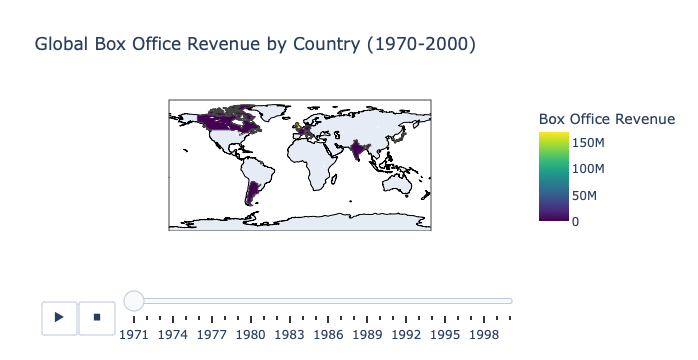

In [30]:
df = df_period4.copy()

# List of country columns (assuming columns are named like 'Country_USA', 'Country_UK', etc.)
country_columns = [col for col in df.columns if col.startswith('Country_') and not col == "Country_United States of America"]

# Aggregate the total box office revenue by country for each year
df_country_revenue_by_year = df.groupby('Year')[country_columns].apply(lambda x: x.multiply(df['Movie_box_office_revenue'], axis=0).sum(axis=0))

# Extract country names from the column names
country_names = [col.split('Country_')[1] for col in country_columns]

# Reshape the DataFrame to make it suitable for Plotly
df_country_revenue = df_country_revenue_by_year.stack().reset_index(name='Movie_box_office_revenue')
df_country_revenue.columns = ['Year', 'Country', 'Movie_box_office_revenue']

# Create the choropleth map with year animation
fig = px.choropleth(df_country_revenue, 
                    locations="Country", 
                    locationmode="country names", 
                    color="Movie_box_office_revenue", 
                    hover_name="Country", 
                    animation_frame="Year",
                    color_continuous_scale="Viridis", 
                    title="Global Box Office Revenue by Country (1970-2000)",
                    labels={'Movie_box_office_revenue': 'Box Office Revenue'})
fig.update_layout(geo=dict(showcoastlines=True, coastlinecolor="Black"))
# Update the animation speed and remove 'Year=' text above slider
fig.update_layout(
    updatemenus=[dict(
        type='buttons',
        showactive=False,
        buttons=[dict(
            method='animate',
            args=[None, dict(
                frame=dict(duration=2000, redraw=True),
                fromcurrent=True,
                mode='immediate',
                transition=dict(duration=500, easing='cubic-in-out')
            )]
        )]
    )],
        sliders=[dict(
        currentvalue=dict(visible=False),  # Hide 'Year=xxxx' above the slider
        transition=dict(duration=500)
    )]
)

# Show the plot
fig.show()
fig.write_html("plots/box_office_per_genre_country_chapter4.html")


The global success of hybrid genres reveals how strategic genre fusion allowed films to transcend regional tastes, creating worldwide blockbusters that appealed to both Western and Eastern audiences. This shift played a major role in Hollywood's global expansion.


4. **Seasonal Release Strategy: Hollywood’s Strategic Marketing Shift**

The timeline shows how the summer blockbuster trend began in the 1970s with films like *Jaws* (1975) and *Star Wars* (1977), followed by a pattern of massive summer releases dominating the box office in subsequent decades.

This new release strategy helped generate global buzz, with sequels and franchise films benefiting from the heightened anticipation of summer releases.

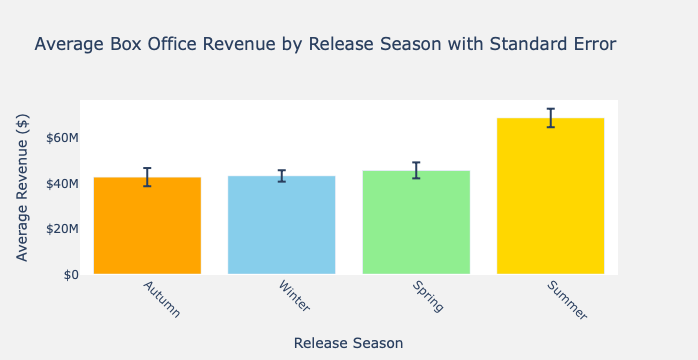

In [31]:

release_season_stats = df_period_season4.groupby('release_season')['Movie_box_office_revenue'].agg(['mean', 'sem']).sort_values(by='mean')

# Create a Plotly bar chart with error bars for each release season
fig = go.Figure()

# Adding bars for average box office revenue
fig.add_trace(go.Bar(
    x=release_season_stats.index,
    y=release_season_stats['mean'],
    name='Average Revenue',
    marker_color=['orange', 'skyblue', 'lightgreen', 'gold'],
    error_y=dict(type='data', array=release_season_stats['sem'], visible=True),
))

# Update layout for a more polished look
fig.update_layout(
    title='Average Box Office Revenue by Release Season with Standard Error',
    xaxis_title='Release Season',
    yaxis_title='Average Revenue ($)',
    xaxis=dict(tickangle=45),  # Rotate x-axis labels for better readability
    yaxis=dict(tickprefix="$"),  # Format y-axis with dollar sign
    bargap=0.2,  # Set the gap between bars for better spacing
    plot_bgcolor='rgb(255, 255, 255)',  # Set the plot background to white
    paper_bgcolor='rgb(242, 242, 242)',  # Set the background of the paper (outside the plot)
)

# Show the plot
fig.show()
fig.write_html("plots/seasonal_release_chapter4.html")

The summer blockbuster strategy not only redefined how movies were marketed but also created a global movie-going culture. Studios began to target the summer season for their highest-grossing films, turning it into a worldwide event.

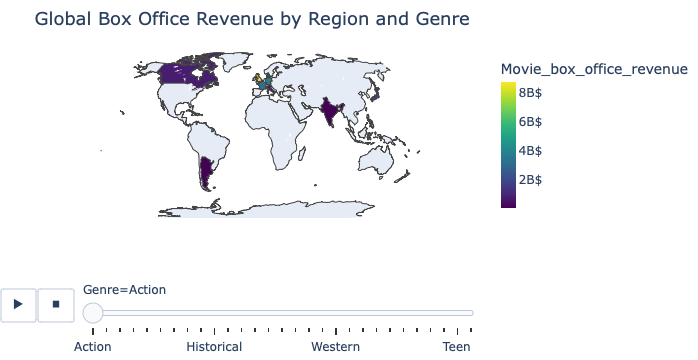

In [32]:
def create_global_box_office_map_with_dummies(df):
    # Identify dummied country and genre columns
    country_columns = [col for col in df.columns if col.startswith('Country_') and not col=="Country_United States of America"]
    genre_columns = [col for col in df.columns if col.startswith('Genre_')]
    
    if not country_columns:
        raise ValueError("No country columns detected in the DataFrame. Ensure dummied countries exist.")
    if not genre_columns:
        raise ValueError("No genre columns detected in the DataFrame. Ensure dummied genres exist.")
    
    # Convert dummied countries to a single 'Country' column
    country_df = df.melt(
        id_vars=['Year', 'Movie_box_office_revenue'] + genre_columns, 
        value_vars=country_columns, 
        var_name='Country', 
        value_name='Is_Country'
    )
    country_df = country_df[country_df['Is_Country'] == 1]  # Keep only rows where country is active
    country_df['Country'] = country_df['Country'].str.replace('Country_', '', regex=False)  # Clean country names
    
    # Convert dummied genres to a single 'Genre' column
    genre_country_df = country_df.melt(
        id_vars=['Year', 'Country', 'Movie_box_office_revenue'], 
        value_vars=genre_columns, 
        var_name='Genre', 
        value_name='Is_Genre'
    )
    genre_country_df = genre_country_df[genre_country_df['Is_Genre'] == 1]  # Keep only rows where genre is active
    genre_country_df['Genre'] = genre_country_df['Genre'].str.replace('Genre_', '', regex=False)  # Clean genre names
    
    # Aggregate revenue by country and genre
    aggregated_data = (
        genre_country_df.groupby(['Country', 'Genre'])
        .agg({'Movie_box_office_revenue': 'sum'})
        .reset_index()
    )
    
    # Create the choropleth map
    fig = px.choropleth(
        aggregated_data,
        locations='Country',
        locationmode='country names',  # Match countries using names
        color='Movie_box_office_revenue',
        hover_name='Movie_box_office_revenue',
        animation_frame='Genre',  # Switch between genres
        title="Global Box Office Revenue by Region and Genre",
        color_continuous_scale='Viridis'
    )
    
    fig.update_layout(
        updatemenus=[dict(
        type='buttons',
        showactive=False,
        buttons=[dict(
            method='animate',
            args=[None, dict(
                frame=dict(duration=2000, redraw=True),  # Duration of each frame
                fromcurrent=True,
                mode='immediate',
                transition=dict(duration=500, easing='cubic-in-out')
            )]
        )]
    )],
        geo=dict(
            showframe=False,
            showcoastlines=True,
            projection_type='natural earth'
        ),
        coloraxis_colorbar=dict(
            title='Movie_box_office_revenue',
            ticksuffix='$',
            thickness=15
        ),
        title_font=dict(size=18),
        margin=dict(l=0, r=0, t=50, b=0)
    )
    
    return fig

# Example usage (assuming 'df' is your dataframe)
global_box_office_fig = create_global_box_office_map_with_dummies(df)
global_box_office_fig.show()
global_box_office_fig.write_html("plots/box_office_per_genre_country_chapter4.html")


# 2000-2015 (Digital Diversity)

Between 2000 and 2015, the film industry underwent a dramatic transformation, driven by technological advancements and the rise of streaming platforms. The digital revolution brought new tools to filmmakers, making production more accessible and diverse stories more common. The real shift, however, came in how films were distributed globally, leading to a surge in international coproductions, hybrid genres, and global audience engagement. Lucas' exploration of this period reveals how cinema moved beyond traditional theatrical releases and embraced a new, interconnected world of diverse, globally distributed films.

In [33]:
period5 = periods[4]
df_period5 = movies_season[movies_season["Year_Interval"]==period5].copy()
char4 = characters_clean[characters_clean["Year_Interval"]==period5].copy()

1. **The Diversity Shift: Representation in Blockbusters**

This chart tracks the growing representation of female and ethnically diverse actors in major blockbuster films from 2000 to 2015.

Films like *The Fast and the Furious* franchise and *Mad Max: Fury Road* exemplified the shift toward more inclusive casting, showcasing both female and multicultural leads.

Additionally, older actors like Liam Neeson in *Taken* demonstrated that age was no longer a barrier for action heroes.


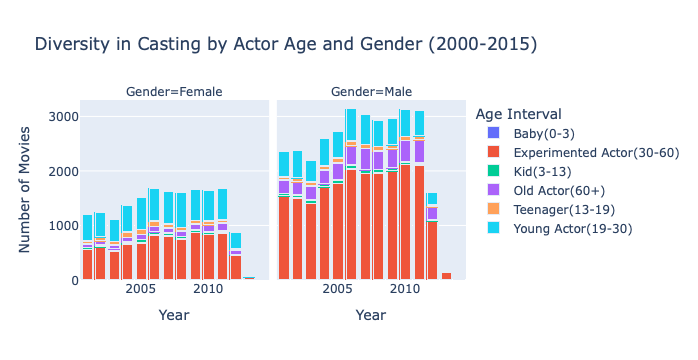

In [34]:
# Count the number of movies per year for each age group and gender
df_age_gender_grouped = char4.groupby(['Year', 'Age_Interval', 'Actor_gender']).size().reset_index(name='Movies_Count')
df_age_gender_grouped.columns = ["Gender" if x=="Actor_gender" else"Age Interval"if x=="Age_Interval" else x for x in df_age_gender_grouped.columns]
df_age_gender_grouped["Gender"] = df_age_gender_grouped["Gender"].apply(lambda x: "Male" if x=="M" else "Female")

# Create the bar plot
fig = px.bar(df_age_gender_grouped, x="Year", y="Movies_Count", color="Age Interval", 
             facet_col="Gender", barmode="stack", title="Diversity in Casting by Actor Age and Gender (2000-2015)")
fig.update_layout(xaxis_title="Year", yaxis_title="Number of Movies")
fig.show()
fig.write_html("plots/diversity_chapter5.html")

2. **Number of Movies per Year Increase Trend**

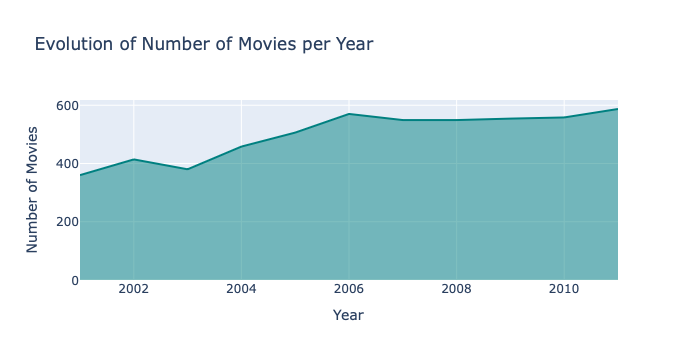

In [35]:
# Assuming you already have the 'movies_per_year' data
# Create a line plot with filled area beneath the curve
fig = go.Figure()

movies_per_year = df_period5[df_period5['Year']<2012]['Year'].value_counts().sort_index()

fig.add_trace(go.Scatter(
    x=movies_per_year.index, 
    y=movies_per_year.values, 
    mode='lines', 
    line=dict(color='teal'),
    fill='tozeroy',  # This will fill the area beneath the line
    fillcolor='rgba(0,128,128,0.5)',  # Set the fill color with transparency
    name='Movies per Year'
))

# Customize layout
fig.update_layout(
    title="Evolution of Number of Movies per Year",
    xaxis_title="Year",
    yaxis_title="Number of Movies",
    showlegend=False,  # Hide the legend as it's not necessary
)

# Show the plot
fig.show()
fig.write_html("plots/nb_of_movies_increase_chapter5.html")

3. **Global Box Office Revenue Distribution: The Rise of International Films**

The heatmap shows how international films, particularly those from countries like South Korea, India, and China, began to have a significant impact on the global box office. Action, fantasy, and horror genres from these regions earned more recognition globally, alongside Hollywood blockbusters.

Films like *Oldboy* (South Korea) and *The Great Wall* (China-US coproduction) showcase how international coproductions and local films started gaining recognition outside their home markets.

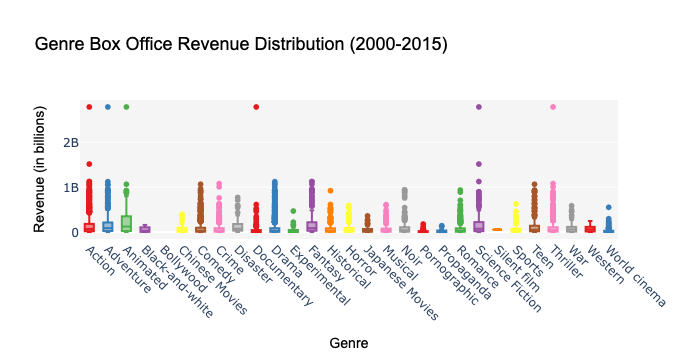

In [37]:
df = df_period5.copy()

# Melt the dataframe to long format, where 'Genre' column will have the genre names
df_melted = df.melt(id_vars=['Movie_box_office_revenue'], 
                    value_vars=[col for col in df.columns if col.startswith('Genre_')],
                    var_name='Genre', value_name='Is_Genre')

# Clean the Genre column names
df_melted["Genre"] = df_melted["Genre"].apply(lambda x: x.replace("Genre_", ""))

# Filter only rows where 'Is_Genre' is 1 (indicating the movie belongs to that genre)
df_genre_revenue = df_melted[df_melted['Is_Genre'] == 1]

# Create the box plot with a color palette and enhanced visual aesthetics
fig = px.box(df_genre_revenue, x="Genre", y="Movie_box_office_revenue", 
             title="Genre Box Office Revenue Distribution (2000-2015)",
             labels={"Genre": "Movie Genre", "Movie_box_office_revenue": "Revenue (in billions)"},
             color="Genre",  # Coloring by Genre for better differentiation
             color_discrete_sequence=px.colors.qualitative.Set1)  # Vibrant color palette

# Customize layout for better readability and visual appeal
fig.update_layout(
    xaxis_title="Genre",
    yaxis_title="Revenue (in billions)",
    xaxis=dict(tickangle=45),  # Rotating x-axis labels for better readability
    plot_bgcolor="whitesmoke",  # Background color for a cleaner look
    showlegend=False,  # Disable legend for a cleaner plot
    title_font=dict(size=18, color='black', family='Arial'),
    xaxis_title_font=dict(size=14, color='black', family='Arial'),
    yaxis_title_font=dict(size=14, color='black', family='Arial')
)

# Show the plot
fig.show()

fig.write_html("plots/genre_box_office_chapter5.html")

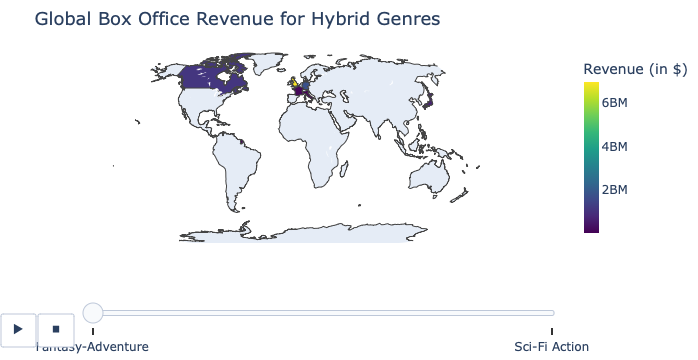

In [38]:
def create_hybrid_genre_map(df):
    # Identify dummied columns
    country_columns = [col for col in df.columns if col.startswith('Country_') and not col=="Country_United States of America"]
    genre_columns = [col for col in df.columns if col.startswith('Genre_')]
    
    # Convert dummied countries to a single 'Country' column
    country_df = df.melt(
        id_vars=['Year', 'Movie_box_office_revenue'] + genre_columns, 
        value_vars=country_columns, 
        var_name='Country', 
        value_name='Is_Country'
    )
    country_df = country_df[country_df['Is_Country'] == 1]  # Filter active countries
    country_df['Country'] = country_df['Country'].str.replace('Country_', '', regex=False)  # Clean names
    
    # Define hybrid genres of interest
    hybrid_genres = {
        'Fantasy-Adventure': ['Genre_Fantasy', 'Genre_Adventure'],
        'Sci-Fi Action': ['Genre_Science Fiction', 'Genre_Action']
    }
    
    # Calculate revenue for each hybrid genre
    hybrid_data = []
    for hybrid_name, genres in hybrid_genres.items():
        # Filter rows where all genres in the hybrid are present
        filtered_df = country_df[
            country_df[genres].all(axis=1)
        ]
        filtered_df = filtered_df.groupby(['Country'], as_index=False).agg({'Movie_box_office_revenue': 'sum'})
        filtered_df['Hybrid_Genre'] = hybrid_name
        hybrid_data.append(filtered_df)
    
    # Combine all hybrid data
    hybrid_genre_df = pd.concat(hybrid_data, ignore_index=True)
    
    #  Create choropleth map
    fig = px.choropleth(
        hybrid_genre_df,
        locations='Country',
        locationmode='country names',
        color='Movie_box_office_revenue',
        hover_name='Country',
        animation_frame='Hybrid_Genre',  # Toggle between Fantasy-Adventure and Sci-Fi Action
        title="Global Box Office Revenue for Hybrid Genres",
        color_continuous_scale='Viridis'
    )
    
    # Customize layout
    fig.update_layout(
        geo=dict(
            showframe=False,
            showcoastlines=True,
            projection_type='natural earth'
        ),
        coloraxis_colorbar=dict(
            title='Revenue (in $)',
            ticksuffix='M',
            thickness=15
        ),
        title_font=dict(size=18),
        margin=dict(l=0, r=0, t=50, b=0),
        sliders=[dict(
            currentvalue=dict(visible=False),  # Hide 'Year=xxxx' above the slider
            transition=dict(duration=500)
        )]
    )
    
    return fig

# Example usage (assuming your dataframe is df)
hybrid_genre_map_fig = create_hybrid_genre_map(df)
hybrid_genre_map_fig.show()

hybrid_genre_map_fig.write_html("plots/hybrid_genres_chapter5.html")